## Imports


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from oqd_compiler_infrastructure import Post, PrettyPrint
from oqd_core.interface.atomic import (
    AtomicCircuit,
    Beam,
    Ion,
    Level,
    ParallelProtocol,
    Phonon,
    Pulse,
    SequentialProtocol,
    System,
    Transition,
)
from rich import print as pprint

from oqd_trical.backend.qutip.base import QutipBackend

In [2]:
matplotlib.rcParams["figure.figsize"] = (12, 8)
matplotlib.rcParams["font.size"] = 20
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

muted_palette = sns.color_palette("muted", n_colors=10, desat=0.8)

## Atomic Circuit


In [3]:
downstate = Level(
    principal=6,
    spin=1 / 2,
    orbital=0,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=0,
    spin_orbital_nuclear_magnetization=0,
    energy=2 * np.pi * 0,
    label="q0",
)
upstate = Level(
    principal=6,
    spin=1 / 2,
    orbital=0,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=1,
    spin_orbital_nuclear_magnetization=0,
    energy=2 * np.pi * 10,
    label="q1",
)
estate = Level(
    principal=5,
    spin=1 / 2,
    orbital=1,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=1,
    spin_orbital_nuclear_magnetization=-1,
    energy=2 * np.pi * 100,
    label="e0",
)
estate2 = Level(
    principal=5,
    spin=1 / 2,
    orbital=1,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=1,
    spin_orbital_nuclear_magnetization=1,
    energy=2 * np.pi * 200,
    label="e1",
)

transitions = [
    Transition(
        level1=downstate, level2=estate, einsteinA=1, multipole="E1", label="q0->e0"
    ),
    Transition(
        level1=downstate, level2=estate2, einsteinA=1, multipole="E1", label="q0->e1"
    ),
    Transition(
        level1=upstate, level2=estate, einsteinA=1, multipole="E1", label="q1->e0"
    ),
    Transition(
        level1=upstate, level2=estate2, einsteinA=1, multipole="E1", label="q1->e1"
    ),
]


Yb171 = Ion(
    mass=171,
    charge=1,
    position=[0, 0, 0],
    levels=[downstate, upstate, estate, estate2],
    transitions=transitions,
)

COM_x = Phonon(energy=0.1, eigenvector=[1, 0, 0])

system = System(
    ions=[
        Yb171,
    ],
    modes=[
        COM_x,
    ],
)

beam = Beam(
    transition=transitions[0],
    rabi=2 * np.pi * 5,
    detuning=2 * np.pi * 25,
    phase=0,
    polarization=[1, 0, 0],
    wavevector=[0, 1, 0],
    target=0,
)

beam2 = Beam(
    transition=transitions[2],
    rabi=2 * np.pi * 5,
    detuning=2 * np.pi * 25,
    phase=0,
    polarization=[1, 0, 0],
    wavevector=[0, 1, 0],
    target=0,
)


beam3 = Beam(
    transition=transitions[1],
    rabi=2 * np.pi * 5,
    detuning=2 * np.pi * 25,
    phase=0,
    polarization=[1, 0, 0],
    wavevector=[0, 1, 0],
    target=0,
)

beam4 = Beam(
    transition=transitions[3],
    rabi=2 * np.pi * 5,
    detuning=2 * np.pi * 25,
    phase=0,
    polarization=[1, 0, 0],
    wavevector=[0, 1, 0],
    target=0,
)


beam5 = Beam(
    transition=transitions[1],
    rabi=2 * np.pi * 5,
    detuning=-2 * np.pi * 25,
    phase=0,
    polarization=[1, 0, 0],
    wavevector=[0, 1, 0],
    target=0,
)

beam6 = Beam(
    transition=transitions[3],
    rabi=2 * np.pi * 5,
    detuning=-2 * np.pi * 25,
    phase=0,
    polarization=[1, 0, 0],
    wavevector=[0, 1, 0],
    target=0,
)

protocol = SequentialProtocol(
    sequence=[
        ParallelProtocol(
            sequence=[
                Pulse(beam=beam, duration=2),
                Pulse(beam=beam2, duration=2),
            ]
        ),
        ParallelProtocol(
            sequence=[
                Pulse(beam=beam3, duration=2),
                Pulse(beam=beam4, duration=2),
            ]
        ),
        ParallelProtocol(
            sequence=[
                Pulse(beam=beam5, duration=2),
                Pulse(beam=beam6, duration=2),
            ]
        ),
    ]
)

circuit = AtomicCircuit(system=system, protocol=protocol)

### Serialization & Deserialization


In [4]:
import json

circuit_json = circuit.model_dump_json()
circuit_json = json.dumps(json.loads(circuit_json), indent=2)

with open("7_example_sequential_parallels.json", "w") as f:
    f.write(circuit_json)

In [5]:
with open("7_example_sequential_parallels.json", "r") as f:
    circuit_json = f.read()

assert AtomicCircuit.model_validate_json(circuit_json) == circuit

## Qutip Intepreter


In [6]:
backend = QutipBackend(solver_options=dict(progress_bar=True))

fock_cutoff = 10
experiment, hilbert_space = backend.compile(circuit, fock_cutoff)

printer = Post(PrettyPrint())

pprint(printer(experiment))

QutipExperiment
  - base: function(<function QutipCodeGeneration.map_OperatorAdd.<locals>.<lambda> at 0x000001ED1AE8FF40>)
  - sequence: list
    - 0: QutipGate
      - hamiltonian: function(<function QutipCodeGeneration.map_OperatorAdd.<locals>.<lambda> at 
0x000001ED1D716C20>)
      - duration: float(2.0)
    - 1: QutipGate
      - hamiltonian: function(<function QutipCodeGeneration.map_OperatorAdd.<locals>.<lambda> at 
0x000001ED1D72D870>)
      - duration: float(2.0)
    - 2: QutipGate
      - hamiltonian: function(<function QutipCodeGeneration.map_OperatorAdd.<locals>.<lambda> at 
0x000001ED1D7404C0>)
      - duration: float(2.0)

### Results


In [7]:
result = backend.run(
    experiment,
    hilbert_space=hilbert_space,
    timestep=1e-2,
)

10.1%. Run time:   1.13s. Est. time left: 00:00:00:10


20.1%. Run time:   2.26s. Est. time left: 00:00:00:08


40.2%. Run time:   4.51s. Est. time left: 00:00:00:06


60.3%. Run time:   6.73s. Est. time left: 00:00:00:04


70.4%. Run time:   7.85s. Est. time left: 00:00:00:03


80.4%. Run time:   8.97s. Est. time left: 00:00:00:02


90.5%. Run time:  10.10s. Est. time left: 00:00:00:01


Total run time:  11.17s


10.1%. Run time:   1.41s. Est. time left: 00:00:00:12


20.1%. Run time:   2.88s. Est. time left: 00:00:00:11


30.2%. Run time:   4.56s. Est. time left: 00:00:00:10


40.2%. Run time:   6.05s. Est. time left: 00:00:00:08


50.3%. Run time:   7.55s. Est. time left: 00:00:00:07


60.3%. Run time:   8.86s. Est. time left: 00:00:00:05


70.4%. Run time:  10.17s. Est. time left: 00:00:00:04


80.4%. Run time:  11.52s. Est. time left: 00:00:00:02


90.5%. Run time:  12.85s. Est. time left: 00:00:00:01


100.0%. Run time:  14.11s. Est. time left: 00:00:00:00


Total run time:  14.11s


10.1%. Run time:   1.77s. Est. time left: 00:00:00:15


20.1%. Run time:   3.54s. Est. time left: 00:00:00:14


30.2%. Run time:   4.82s. Est. time left: 00:00:00:11


40.2%. Run time:   6.00s. Est. time left: 00:00:00:08


50.3%. Run time:   7.19s. Est. time left: 00:00:00:07


60.3%. Run time:   8.37s. Est. time left: 00:00:00:05


70.4%. Run time:   9.54s. Est. time left: 00:00:00:04


80.4%. Run time:  10.72s. Est. time left: 00:00:00:02


90.5%. Run time:  11.89s. Est. time left: 00:00:00:01


100.0%. Run time:  13.02s. Est. time left: 00:00:00:00


Total run time:  13.02s


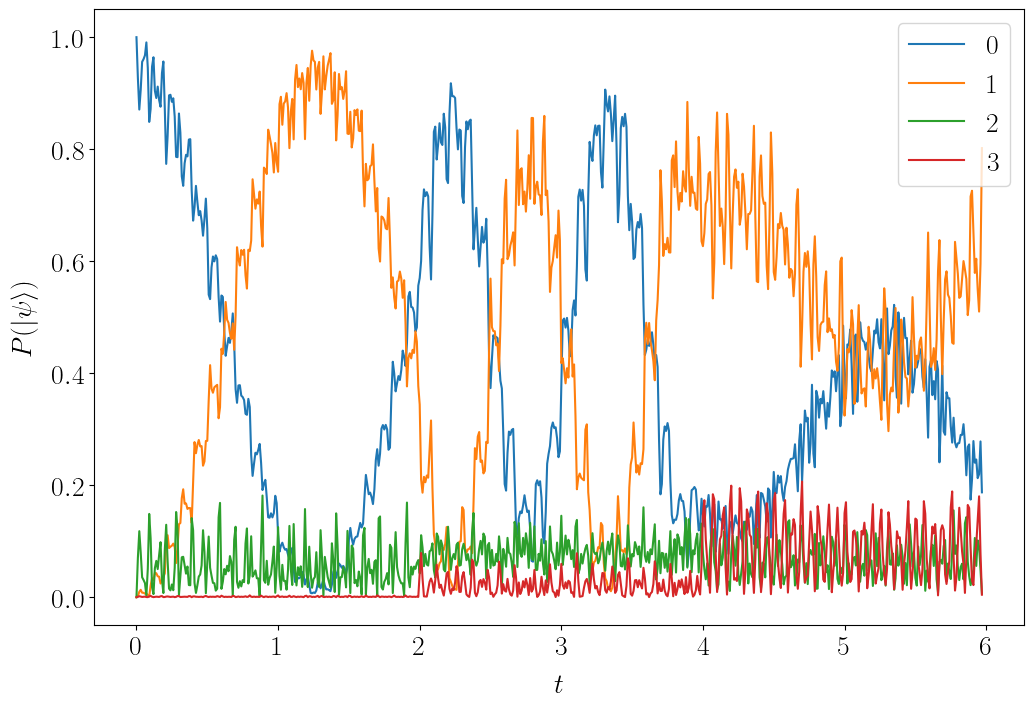

In [8]:
k = slice(None, None, 1)

fig = plt.figure()

ax = fig.subplots(1, 1, sharex=True)

ax.plot(
    result["tspan"][k],
    [s.ptrace(0).diag()[:4] for s in result["states"][k]],
    label=range(4),
)

ax.set_xlabel(r"$t$", labelpad=10)
ax.set_ylabel(r"$P(| \psi \rangle)$", labelpad=10)

ax.legend()